# <center> APRENDIZAJE NO SUPERVISADO (DengAI)<center>

**Nombre y apellidos:** Albert Doblas Moreno



---
# Resumen
---

Este trabajo consta de la aplicación de algoritmos de aprendizaje no supervisado con información sobre casos de Dengue. El objetivo principal del trabajo es aplicar modelos de clústering para agrupar los datos que obtenemos. A continuación, se describe brevemente los diferentes apartados y lo que se ha pretendido realizar en cada uno de ellos.


*   **Exploración:** Primero se ha realizado un preprocesado de los datos incluyendo estudio de valores atípicos y nulos. Después, se han explorado la tendencia y variación de diferentes características (evoluciones temporales, correlaciones, dispersiones,...)
*   **Características**: Es importante hacer una selección de características relevantes para aplicar a los modelos de clústering. Se ha realizado un estudio de características apoyado en un análisis de componentes principales (PCA) y dendogramas. Además, se ha creado una característica nueva (binarizado de ciudades).
*   **Clustering**: Finalmente, se han aplicado los modelos de clústering (k-Means, DBSCAN, ...) para poder estudiar sus resultados y extraer conclusiones.
*   **Conclusiones**: La actividad concluye resumiendo los descubrimientos principales y eligiendo el mejor modelo de clústering basado en los resultados obtenidos.








---
# Inicialización
---

In [ ]:
# Imports generales
import pandas as pd
import io
from google.colab import files

seed = 42  # Semilla aleatoria arbitraria y constante a incluir en los algoritmos estocásticos para que los experimentos sean siempre reproducibles por el profesor.

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [ ]:
# Subir el conjunto de entrenamiento sin variable objetivo (dengue_features_train.csv)
train = upload_files()
print(train.shape)
train.head()

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes
(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


---
# Exploración
---

## Preprocesado de los datos

In [ ]:
# EJEMPLO: Eliminar variable week_start_date por ser de tipo cadena de texto sin formato
train.drop("week_start_date", axis = 1, inplace = True)

### Estudio sobre valores nulos e imputación

Primero, contaremos cuantos valores nulos tiene cada columna de nuestro dataset. De esta manera, podremos saber si hay alguna característica más "problemática" que otra.

In [ ]:
# Contar valores perdidos
train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

Vemos que "ndvi_ne" tiene hasta 194 valores nulos. Sin embargo, tenemos varias filas, así que sería interesante contabilizar el porcentaje de valores nulos teniendo en cuenta el total de valores de cada columna.

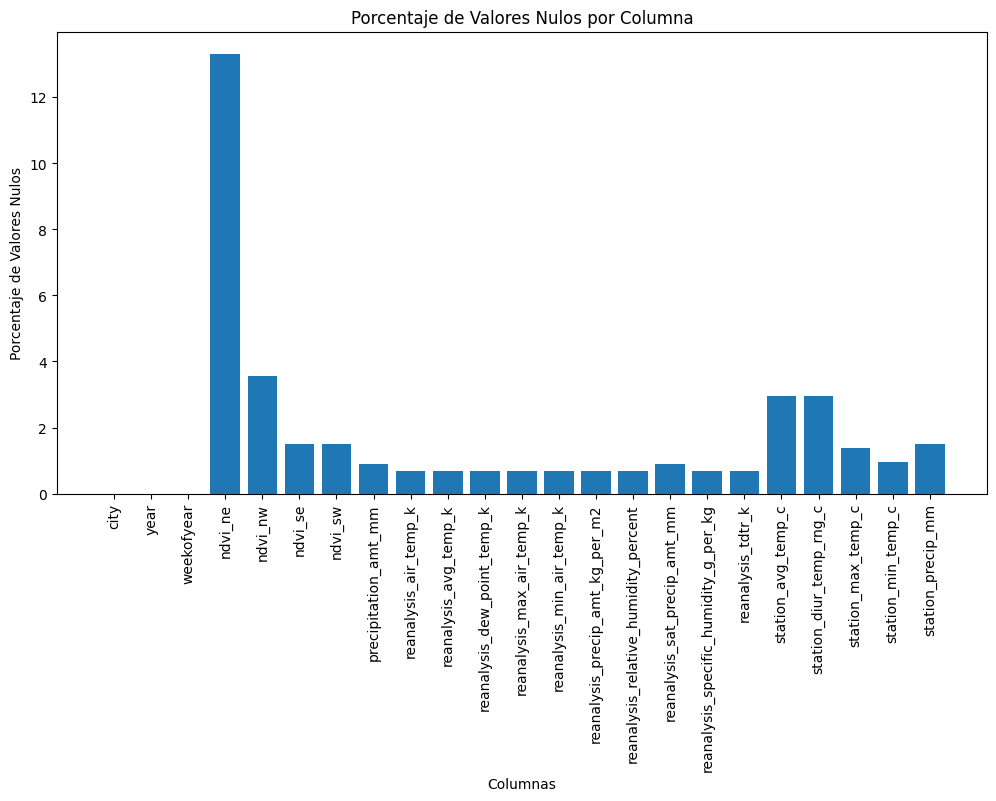

In [ ]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos_por_columna = (train.isnull().mean() * 100).round(2)

# Graficar el porcentaje de valores nulos
plt.figure(figsize=(12, 6))
plt.bar(porcentaje_nulos_por_columna.index, porcentaje_nulos_por_columna)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Valores Nulos')
plt.title('Porcentaje de Valores Nulos por Columna')
plt.xticks(rotation=90)
plt.show()


Vemos que el máximo representa aproximadamente un 13% del total de valores de la columna, mientras que ninguna otra característica supera el 4%. Son números que no deberían alterar el resultado si los eliminamos o rellenamos de una manera "simple". Sin embargo, tal y como se propone en la plantilla, se utiliza el método de interpolación para imputar los valores nulos.

In [ ]:
# Imputación utilizando el método de interpolación lineal de valores nulos
train.interpolate(method='linear', inplace=True)
pd.isnull(train).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

### Detección de outliers

Es importante detectar e imputar (si es necesario) outliers en nuestro dataset de manera que no afecten a nuestros resultados. En este caso se han determinado utilizando el rango intercuartílico (IQR) (https://www.askpython.com/python/examples/how-to-determine-outliers)

Sin embargo, primero vamos a categorizar la columna city para que pueda usarse en la detección de outliers como un número.

In [ ]:
# EJEMPLO: Binarizador para la variable categórica city en el conjunto de entrenamiento y test
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])

train.head(5)


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_bin
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,1
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,1
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,1
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,1
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,1


In [ ]:
#Eliminamos la columna 'city' (ya la hemos categorizado en 0-1)
train = train.drop(columns=['city'])

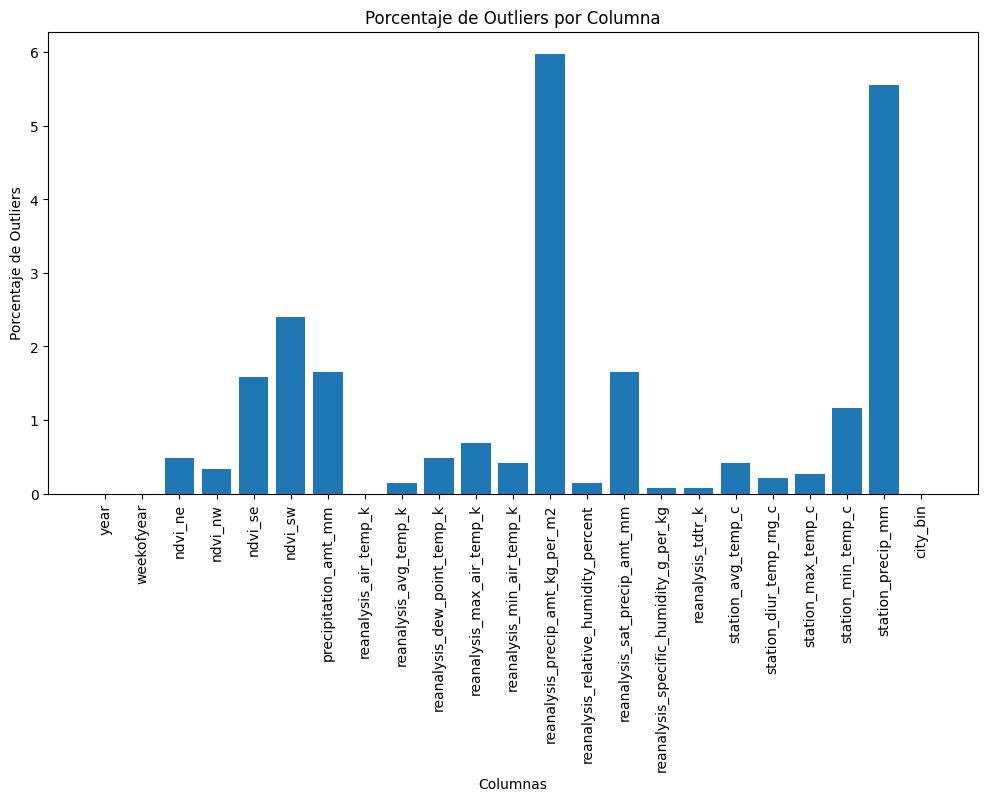

In [ ]:
import numpy as np
#Detección de outliers usando el metodo IQR (con las columnas en formato numérico)

numeric_columns = train.select_dtypes(include=[np.number]).columns

Q1 = train[numeric_columns].quantile(0.25)
Q3 = train[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

umbral = 1.5

lower_bound = Q1 - (umbral * IQR)
upper_bound = Q3 + (umbral * IQR)

outliers = ((train[numeric_columns] < lower_bound) | (train[numeric_columns] > upper_bound))

porcentaje_outliers_por_columna = (outliers.sum() / len(train) * 100).round(2)

plt.figure(figsize=(12, 6))
plt.bar(porcentaje_outliers_por_columna.index, porcentaje_outliers_por_columna)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Outliers')
plt.title('Porcentaje de Outliers por Columna')
plt.xticks(rotation=90)
plt.show()



Vemos que el máximo de outliers es de un 6%, por lo que no representan un porcentaje muy alto de los datos. Sin embargo, valores muy diferentes podrían distorsionar nuestros modelos de machine learning, por lo que vamos a eliminar estos outliers.

In [ ]:
# Filtrar los outliers
X_train = train[~outliers.any(axis=1)]



In [ ]:
print("Old Shape: ", train.shape)
print("New Shape: ", X_train.shape)


Old Shape:  (1456, 23)
New Shape:  (1202, 23)


Vemos que se han eliminado los outliers correctamente. A pesar de no representar un porcentaje muy elevado, podría ser que eliminar 2500 filas haga que nuestro modelo no sea del todo representativo. Sin embargo, creo que todavía hay mucha información para que los modelos de clústering que se presentarán después funcionen correctamente (y así evitamos problemas con valores atípicos)

## Exploración de los datos (evoluciones temporales, correlaciones, ...)

Tenemos varias opciones para explorar los datos, una vez hemos aplicado un previo preprocesamiento.

La primera visualización es la de la matriz de correlación, para poder observar si existen correlaciones entre las variables. Esto es útil a la hora de escoger qué columnas son representativas en nuestro estudio. Como podemos observar, prácticamente todas las columnas tienen algún tipo de correlación con alguna otra, por lo que habrá que hacer un estudio más intensivo más adelante.

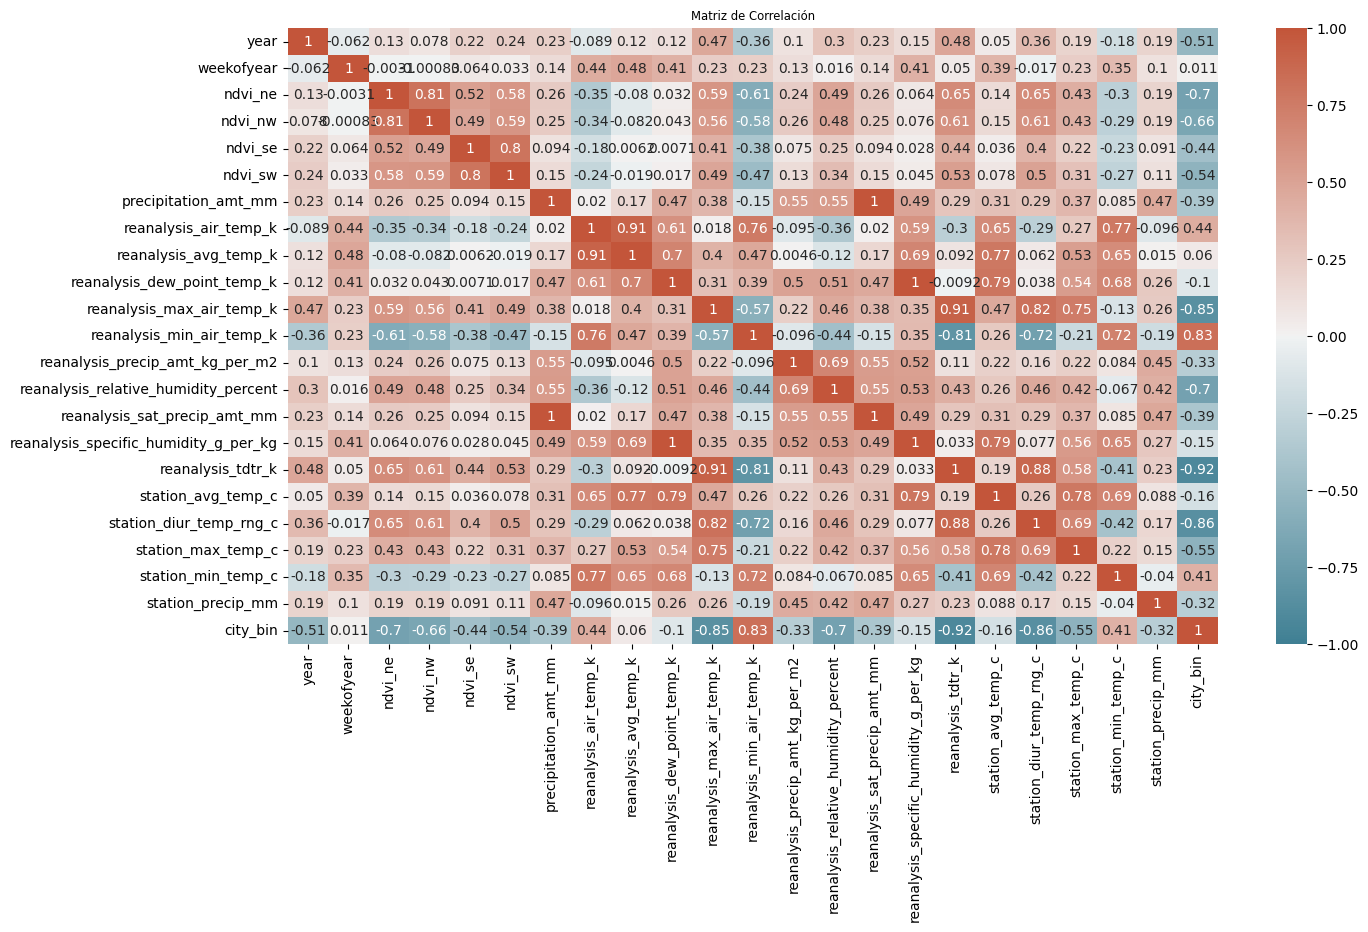

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear una matriz de correlación
correlation_matrix = X_train.corr()

# Definir colores del mapa de calor
cmap = sns.diverging_palette(220, 20, as_cmap=True)


# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
sns.set()
sns.set(font_scale=0.7)
plt.title('Matriz de Correlación')
plt.show()

También creo que sería interesante ver la evolución de la temperatura media en las dos ciudades a lo largo de los años. Debido al cambio climático, deberíamos ver una tendencia que nos diga que está subiendo... ¿O no? Quizá nos faltarían muchos más datos de años para ver una evolución, 20 años no es tanto.

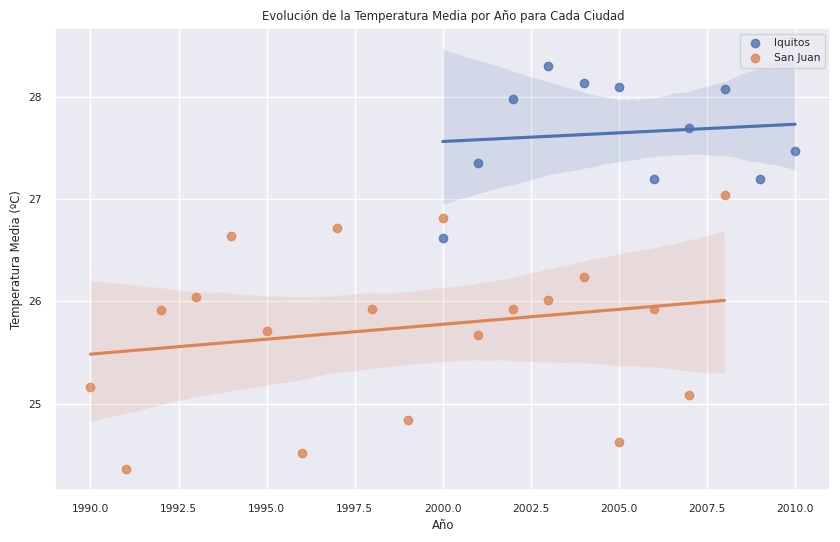

In [ ]:
# Calcular la temperatura media por año para cada ciudad
temp_por_año = X_train.groupby(['year', 'city_bin'])['station_avg_temp_c'].last().unstack()

# Graficar la evolución de la temperatura media por año para cada ciudad con scatter plot y línea de tendencia
plt.figure(figsize=(10, 6))

for city in temp_por_año.columns:
    sns.regplot(x=temp_por_año.index, y=temp_por_año[city], scatter=True, label='San Juan' if city == 1 else 'Iquitos')

plt.xlabel('Año')
plt.ylabel('Temperatura Media (ºC)')
plt.title('Evolución de la Temperatura Media por Año para Cada Ciudad')
plt.legend()
plt.grid(True)
plt.show()


Para la ciudad de San Juan vemos que hay una tendencia bastante clara: la temperatura media crece con los años. Sin embargo, para la ciudad de Iquitos, no hay una tendencia clara en los resultados... Además, tenemos menos datos, por lo que no parece que podamos extraer información sobre la temperatura media en este caso. También podemos ver como en Iquitos hace más calor de media que en San Juan.

También podemos ver como afecta la precipitación a la temperatura media. Normalmente, los días más calurosos y los más fríos, suelen ser días despejados (sin precipitaciones). Esto se puede comprobar en el siguiente gráfico de dispersión, dado que en los picos de frío y calor la precipitación es mucho menor que en las temperaturas medias, debido a la suavidad de la temperatura durante las precipitaciones.

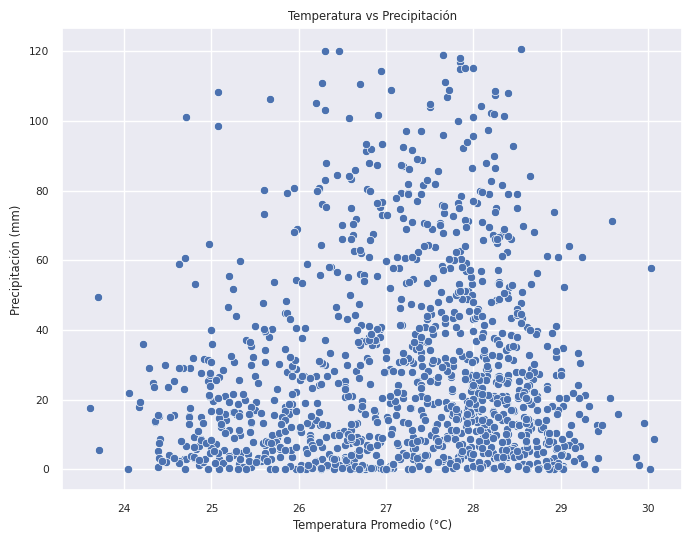

In [ ]:
# Gráfico de dispersión entre la temperatura media y la precipitación
plt.figure(figsize=(8, 6))
sns.scatterplot(x='station_avg_temp_c', y='station_precip_mm', data=X_train)
plt.title('Temperatura vs Precipitación')
plt.xlabel('Temperatura Promedio (°C)')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.show()




En el gráfico de dispersión vemos que hay bastantes más puntos en la parte baja del eje Y, es decir, parece que no llueve mucho en estas dos ciudades. Para verlo más claro, haremos un histograma con la frecuencia de lluvia para ver así la distribución. Para la ciudad de San Juan, claramente la frecuencia es mucho más alta para precipitaciones cercanas a 0, mientras que para Iquitos no hay tanta diferencia (a pesar que sigue siendo mayor).

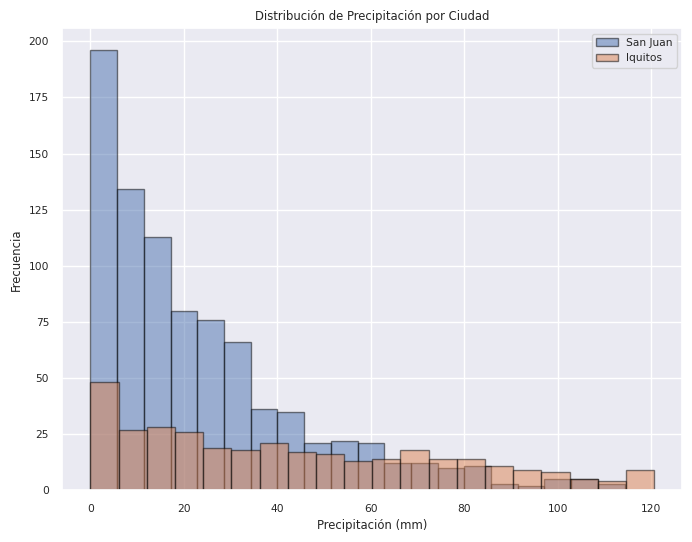

In [ ]:

# Distribución de precipitación

# Dividir los datos por ciudad
precipitacion_sj = X_train[X_train['city_bin'] == 1]['station_precip_mm']
precipitacion_iq = X_train[X_train['city_bin'] == 0]['station_precip_mm']

# Graficar histogramas para cada ciudad
plt.figure(figsize=(8, 6))
plt.hist(precipitacion_sj, bins=20, edgecolor='black', alpha=0.5, label='San Juan')
plt.hist(precipitacion_iq, bins=20, edgecolor='black', alpha=0.5, label='Iquitos')

plt.title('Distribución de Precipitación por Ciudad')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()



---
# Características
---

La selección de características para aplicar los modelos de machine learning es un paso fundamental y relevante. Antes ya hemos aplicado una transformación de características binarizando las ciudades para que sea más adecuado de graficar (1 en vez de 'sj'). Esto también nos ayudará a la hora de aplicar modelos de clústering. Lo que se ha realizado es un análisis de características mediante PCA con el dataset traspuesto. Primero, se normaliza el dataset y se eligen 2 componentes principales.

In [ ]:
df_feat = X_train.transpose()

In [ ]:
names = df_feat.index
print(names)


Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'city_bin'],
      dtype='object')


Componentes lineales:
 [[ 0.02893285  0.02892943  0.02885794 ...  0.02879504  0.02876609
   0.02877813]
 [-0.01942743 -0.01525183 -0.00170901 ...  0.01517987  0.01801271
   0.01711081]]

Ratio de variabilidad:  [9.99098754e-01 6.04747646e-04] 



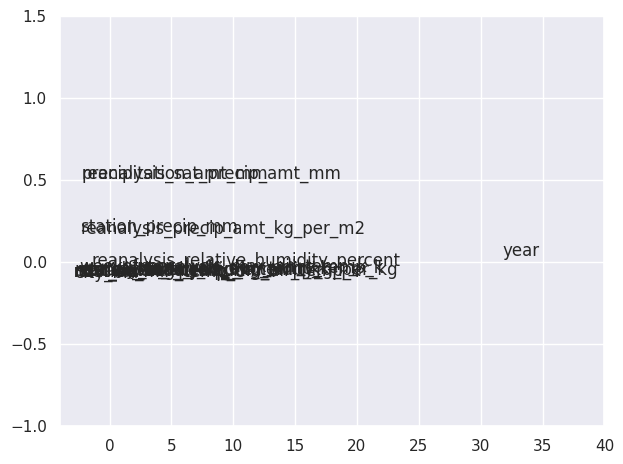

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)

from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Componentes lineales:\n", estimator.components_)
print("\nRatio de variabilidad: ", estimator.explained_variance_ratio_, "\n")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i])

plt.xlim(-4, 40)
plt.ylim(-1, 1.5)
ax.grid(True)
fig.tight_layout()
plt.show()

Vemos como la componente principal explica prácticamente todas las variables. Se diferencian fácilmente 3 o 4 clústers, donde 'year' está muy diferenciado del resto. Aplicamos una matriz de correlación, donde podríamos llegar a ver los diferentes clústeres que se forman. Sin embargo, mediante un dendograma podremos verlo más gráficamente.

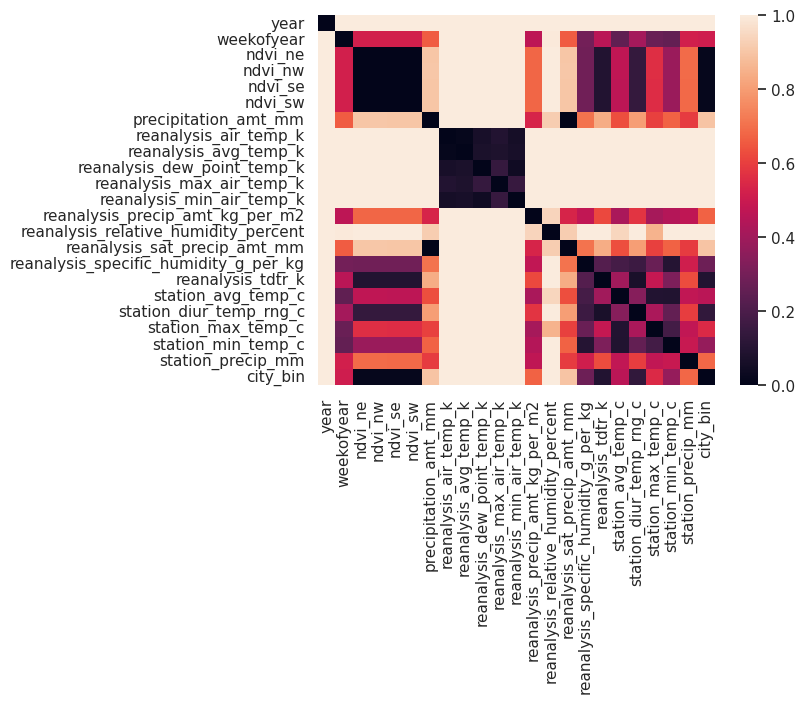

In [ ]:
# 2. Compute the similarity matrix
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.metrics
dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)

# 3.1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

<ipython-input-36-c3caf33353fd>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


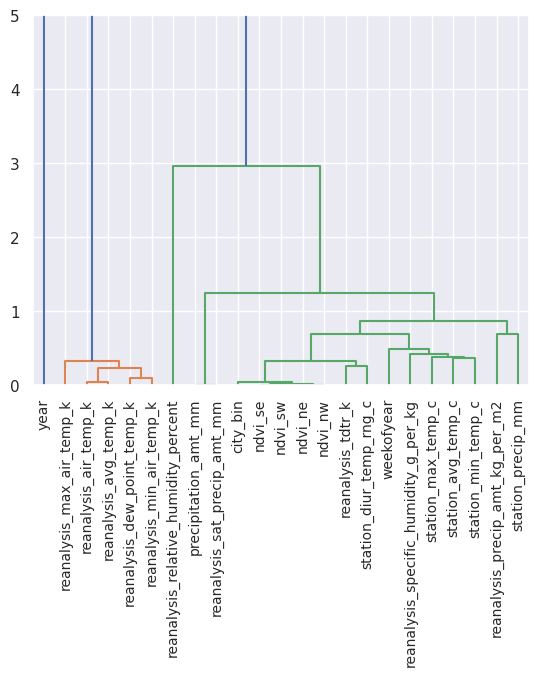

In [ ]:
# 3. Building the Dendrogram

clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)

plt.ylim(0, 5)
plt.show()

Haciendo un corte en 3 podemos diferenciar 3 clústers, aunque el corte se podría haber hecho más abajo y seleccionar otras variables como 'reanalysis_relative_humidity_percent'. De hecho, se podrían incluso diferenciar 5 clústeres.. Podemos graficar en una dispersión para ver como se pueden diferenciar hasta 5 regiones diferentes (si hacemos el corte en 1)

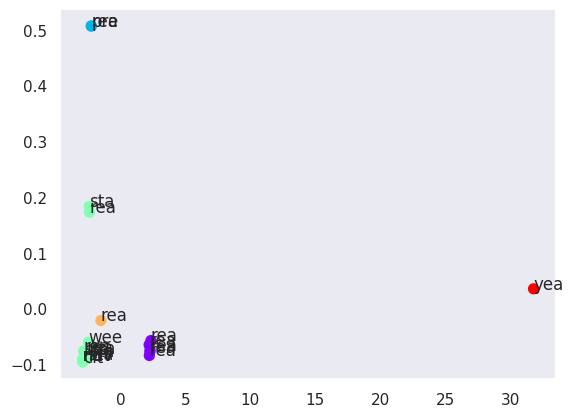

In [ ]:
cut = 1
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50, cmap="rainbow")
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3])

plt.grid()
plt.show()

Vemos como 'year' está claramente diferenciada del resto pero tenemos hasta 5 características (o grupos) relevantes. Si quisiéramos optimziar al máximo los modelos de clústering, se podrían seleccionar sólo 3 características relevantes de cada clúster. Sin embargo, para encontrar el mejor rendimiento usaremos 5 características en este caso.

---
# Clustering
---

Pasamos ahora aplicar los modelos de clústering. Primero haremos una transformación y preparación de datos, es decir, elegir las características principales basado en el análisis anterior y normalizar los datos.

## Transformación de datos y preparación

In [ ]:
# Selección de características apoyado en PCA anterior
features = ['year', 'weekofyear', 'reanalysis_avg_temp_k', 'precipitation_amt_mm', 'reanalysis_relative_humidity_percent']

X_train[features].head()

,year,weekofyear,reanalysis_avg_temp_k,precipitation_amt_mm,reanalysis_relative_humidity_percent
0,1990,18,297.742857,12.42,73.365714
1,1990,19,298.442857,22.82,77.368571
2,1990,20,298.878571,34.54,82.052857
3,1990,21,299.228571,15.36,80.337143
4,1990,22,299.664286,7.52,80.460000


In [ ]:
# EJEMPLO: Normalización con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_train)
X_scaled

array([[0.        , 0.32692308, 0.50234868, ..., 0.26315789, 0.13266998,
        1.        ],
       [0.        , 0.34615385, 0.56583009, ..., 0.55263158, 0.07131012,
        1.        ],
       [0.        , 0.36538462, 0.38108979, ..., 0.63157895, 0.34328358,
        1.        ],
       ...,
       [1.        , 0.42307692, 0.66938277, ..., 0.15789474, 0.06135987,
        0.        ],
       [1.        , 0.44230769, 0.78595397, ..., 0.39473684, 0.13266998,
        0.        ],
       [1.        , 0.46153846, 0.73800255, ..., 0.55263158, 0.16915423,
        0.        ]])

## K-Means

El primer modelo aplicado es 'k-Means'. Antes hemos visto como podríamos obtener de 3-5 clústeres. Mediante el método del codo ("*Satopää et al.: Finding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior*"), obtendremos el valor óptimo de clústeres para aplicarlo en nuestro modelo k-Means.

In [ ]:
!pip install kneed
import kneed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Elbow: 3


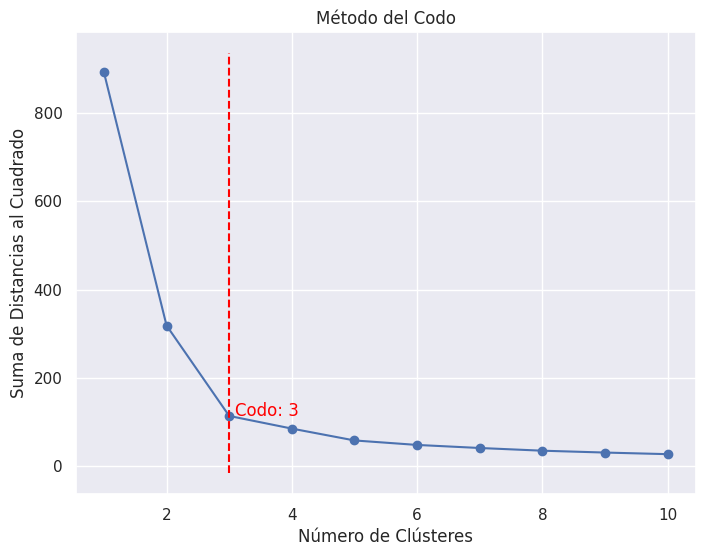

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Realizar el método del codo para determinar el número óptimo de clústeres
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=seed)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Calcular el punto del codo usando KneeLocator
kneedle = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
elbow_point = kneedle.elbow
print('Elbow:', elbow_point)

# Graficar la suma de las distancias al cuadrado (WCSS) en función del número de clústeres con el codo señalado
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Suma de Distancias al Cuadrado')
plt.grid(True)

# Señalar el codo en el gráfico
plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.text(elbow_point + 0.1, wcss[elbow_point - 1], f'Codo: {elbow_point}', color='red')

plt.show()


Efectivamente, vemos que el codo se situa en 3 clústeres, que es lo que usaremos en nuestro modelo.

Antes de aplicar el modelo hemos usado PCA para visualizar en 2D el resultado del algoritmo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


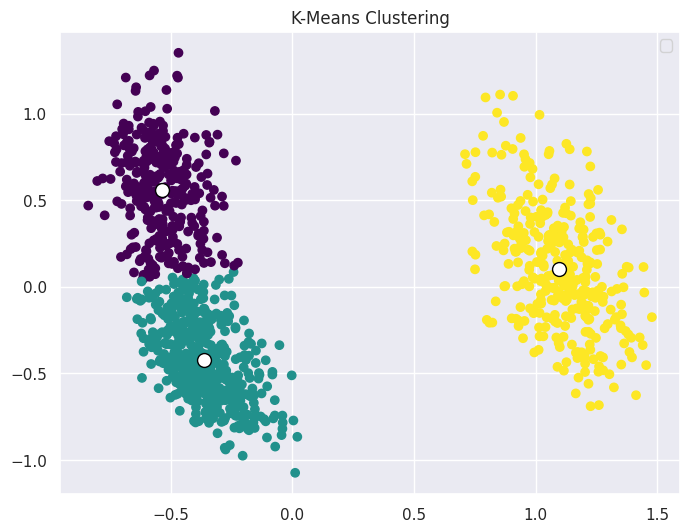

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Entrenar K-Means
kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans_labels = kmeans.fit_predict(X_pca)

# Obtener los centros de los clusters
centers = kmeans.cluster_centers_

# Graficar los puntos de datos y los centros de los clusters en 2D usando PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=100, color='white', edgecolor='black')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


Vemos que hay tres clústers bien diferenciados. También se ha incluido el centro del clúster en el gráfico. Parece que el modelo de k-Means es capaz de diferenciar los tres clústers con relativa facilidad...

## DBSCAN

Pasaremos a usar ahora el método DBSCAN (density-based clustering algorithm), que tal como indica su nombre es un modelo basado en densidad. Primero haremos una transformación de los datos para visualizarlos mejor a la hora de aplicar los modelos.

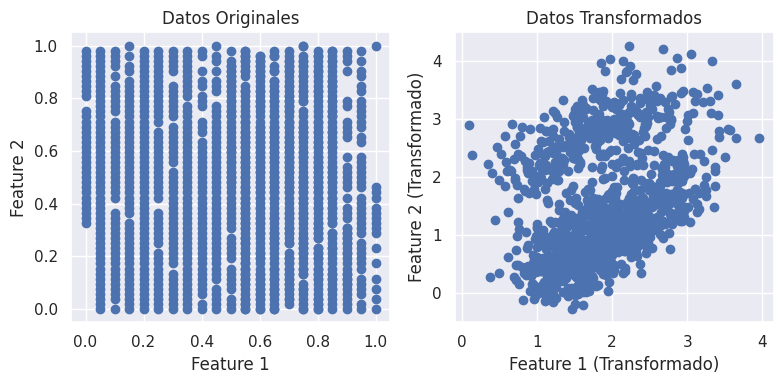

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Genera la matriz de transformación aleatoria para estirar los datos
transformation = np.random.normal(size=(X_scaled.shape[1], 2))
X = np.dot(X_scaled, transformation)

# Graficar los datos originales y los datos transformados
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title('Datos Originales')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Datos Transformados')
plt.xlabel('Feature 1 (Transformado)')
plt.ylabel('Feature 2 (Transformado)')

plt.tight_layout()
plt.show()


Creo que ahora se verán mejor....

Primero vamos a optimizar el valor de epsilon (eps) del cual depende DBSCAN (https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc)

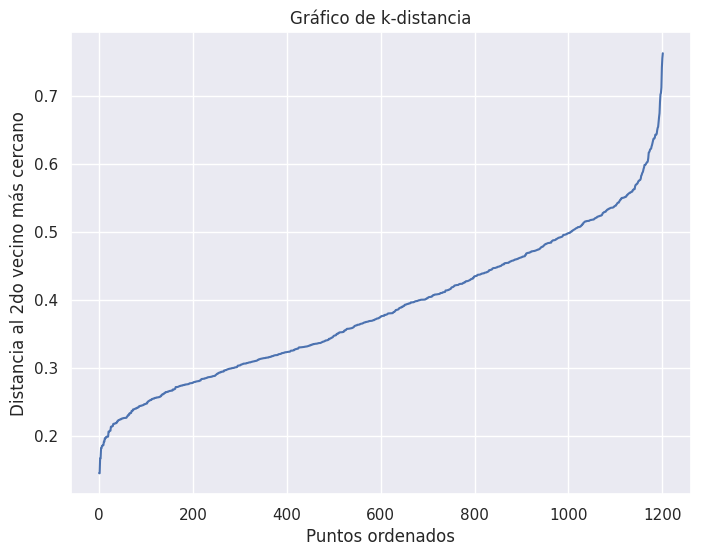

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Calcula la distancia al k-ésimo vecino más cercano
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled)
distances, _ = neighbors_fit.kneighbors(X_scaled)

# Ordena las distancias y grafica
distances = np.sort(distances, axis=0)
distances = distances[:,1]  # Tomamos la distancia al 2do vecino más cercano

# Graficar la distancia al k-ésimo vecino más cercano
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Gráfico de k-distancia')
plt.show()


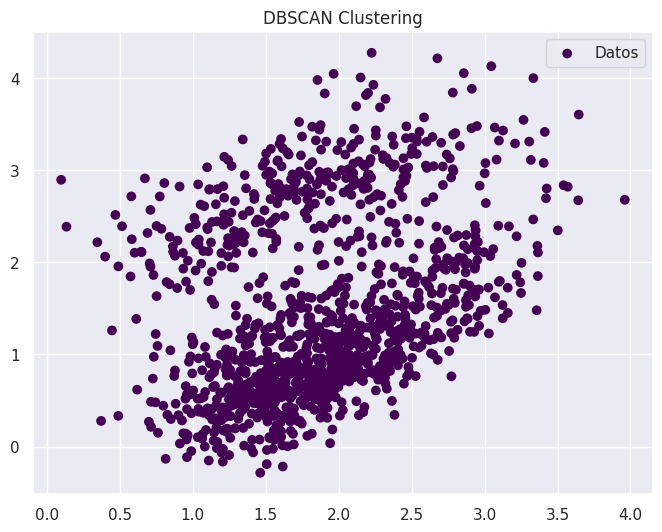

In [ ]:
from sklearn.cluster import DBSCAN

# Entrenar DBSCAN
dbscan = DBSCAN(eps=0.12, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', label='Datos')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


Sin embargo, vemos como con el valor de eps optimizado no es capaz de diferenciar entre clústeres... Se ha intentado optimizar (con prueba y error) hasta poder ver algún clúster más, pero el modelo no parece ser capaz de diferenciar correctamente.

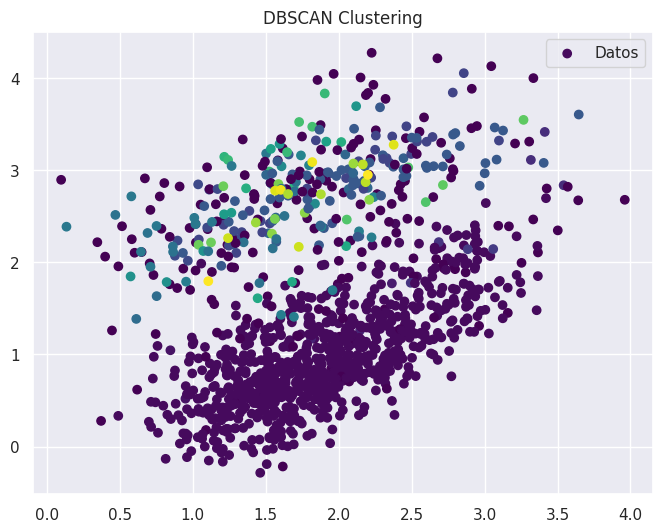

In [ ]:
# Entrenar DBSCAN
dbscan_2 = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan_2.fit_predict(X_scaled)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', label='Datos')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

## Mean-Shift

No hemos tenido mucho éxito con DBSCAN, pero ahora pasaremos a intentar usar otro método de densidad como Mean-Shift. Aquí el parámetro clave es el 'bandwidth', que calculamos previamente:

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Encuentra el ancho de banda utilizando la función estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)

# Entrenar el modelo Mean-Shift
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X_scaled)


MeanShift(bandwidth=0.5170741261442049)

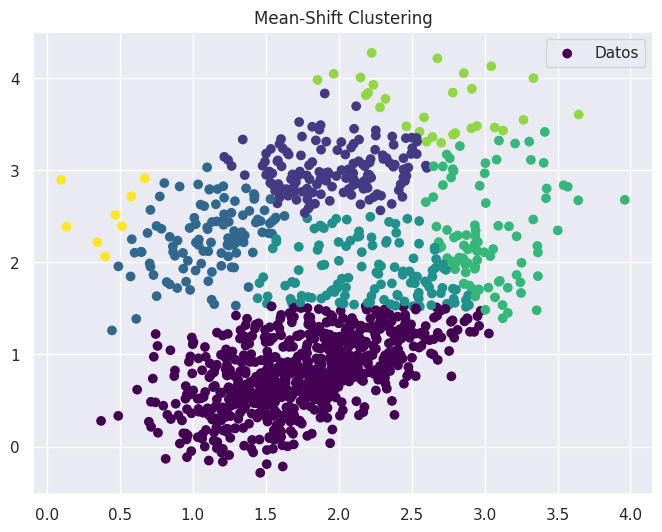

In [ ]:
from sklearn.cluster import MeanShift

# Entrenar Mean-Shift
meanshift = MeanShift(bandwidth=0.51)
meanshift_labels = meanshift.fit_predict(X)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=meanshift_labels, cmap='viridis', label='Datos')
plt.title('Mean-Shift Clustering')
plt.legend()
plt.show()


Parece que ha sido capaz de diferenciar entre clústeres, pero vemos como los métodos de densidad no parecen ser los más adecuados en el contexto de este tipo de dataset. Hay demasiados clústeres y algunos puntos parece no saber adjudicarlos con precisión. Se podría intentar mejorar el 'bandwidth' para ver si mejora...

## Gaussian Mixture Model (GMM)

El método GMM debería darnos un resultado similar a k-Means. Aquí definimos un número de componentes previamente. Vemos como, efectivamente, se han diferenciado tres clústeres con bastante precisión, por lo que obtenemos un resultado muy similar a k-Means. Más adelante veremos cuál es mejor mediante métricas adecuadas.

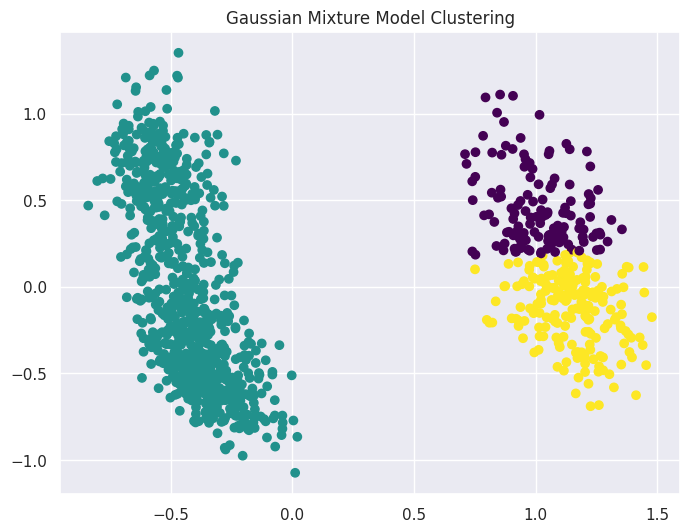

In [ ]:
from sklearn.mixture import GaussianMixture

# Entrenar Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=seed)
gmm_labels = gmm.fit_predict(X_pca)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', label='Datos')
plt.title('Gaussian Mixture Model Clustering')
#plt.legend()
plt.show()


## Spectral clustering

Finalmente, se describe en esta práctica un método no visto en clase como Spectral Clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html). Spectral clustering es un método que usa información de la estructura de similitud entre datos para agruparlos, basándose en los eigenvalores y eigenvectores de una matriz de afinidad. Definimos el número de clústers en 3 igual que en k-Means y obtenemos un resultado similar, donde se diferencian claramente los tres clústers.

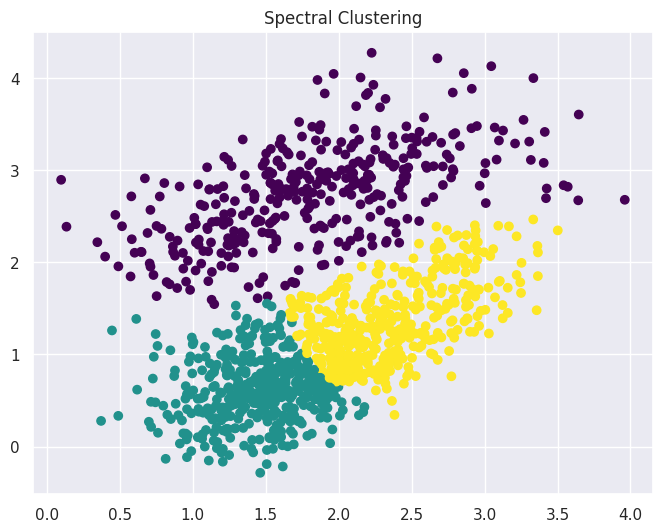

In [ ]:
from sklearn.cluster import SpectralClustering

# Entrenar Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis', label='Datos')
plt.title('Spectral Clustering')
#plt.legend()
plt.show()


---
# Conclusiones
---

Como conclusión, vamos a comparar los diferentes resultados obtenidos en los métodos de clustering mediante el coeficiente de silhouette (https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c). El coeficiente silhouette evalúa la cohesión dentro de un cluster y la separación entre clusters, midiendo la calidad de la agrupación en relación con la distancia media intra-cluster y la distancia mínima inter-cluster.


El coeficiente silhouette varía entre -1 y 1:

*  **Cercano a 1:** Indica que la instancia está bien situada dentro de su cluster y está alejada de los clusters vecinos.
*   **Cercano a 0**: Indica que la instancia está en o muy cerca del límite de decisión entre dos clusters.
*  **Cercano a -1:** Indica que la instancia puede haber sido asignada al cluster incorrecto.

In [ ]:
from sklearn.metrics import silhouette_score

def cluster_metrics(X, labels):
    metrics = {
        'Silhouette Score': silhouette_score(X, labels),
            }
    return metrics

# Para K-Means
kmeans_metrics = cluster_metrics(X_pca, kmeans_labels)

# Para DBSCAN
dbscan_metrics = cluster_metrics(X, dbscan_labels)

# Mean-Shift
meanshift_metrics = cluster_metrics(X, meanshift_labels)

# Para GMM
gmm_metrics = cluster_metrics(X, gmm_labels)

# Spectral Clustering
spectral_metrics = cluster_metrics(X, spectral_labels)

# Imprimir los resultados
print("K-Means Metrics:")
print(kmeans_metrics)
print("\nDBSCAN Metrics:")
print(dbscan_metrics)
print("\nMeanShift Metrics:")
print(meanshift_metrics)
print("\nGMM Metrics:")
print(gmm_metrics)
print("\nSpectral Clustering Metrics:")
print(spectral_metrics)


K-Means Metrics:
{'Silhouette Score': 0.6606648558469966}

DBSCAN Metrics:
{'Silhouette Score': -0.49717656610837824}

MeanShift Metrics:
{'Silhouette Score': 0.3273911420379456}

GMM Metrics:
{'Silhouette Score': 0.3256933597912813}

Spectral Clustering Metrics:
{'Silhouette Score': 0.40913958961048597}


Vemos como todos los métodos han sido capaces de realizar el clústering relativamente bien, menos el método DBSCAN que obtiene un valor negativo. De todos los métodos, k-Means es el que obtiene un valor mayor (>0.5 se consideraría aceptable) y por lo tanto es el modelo elegido en este trabajo para realizar el clústering.

## Conclusiones finales y trabajo futuro

Este trabajo ha sido muy efectivo para aprender cómo trabajar con datasets y su uso en modelos de aprendizaje no supervisado. Es muy interesante la parte de pre-procesado y, sobretodo, la aplicación de PCA para seleccionar las características más relevantes. Finalmente, he podido aplicar los modelos vistos en clase de clústering (y "pelearme" con ellos).

Considero que los modelos se podrían optimizar todavía más. Se podría repetir el preprocesado (valores nulos, outliers) así como optimizar todavía más la selección de características. Además, los parámetros usados en los modelos también se podrían todavía optimizar más, aunque considero que lo explicado y mostrado en esta práctica es suficiente para aprender a utilizarlos.